In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import make_interp_spline, interp1d

In [5]:
tmp = pd.read_stata(r"C:\Users\Misaka19090-\Downloads\behavioral_data_all_from_cong_binie_0523.dta")

In [29]:
fb_d = pd.read_csv("Feedback_Dutch_new_all_session.csv")
fb_h = pd.read_csv("Feedback_Honolulu_new_all_session.csv")

In [30]:
df = pd.read_csv("Dutch_paydiff_norm.csv")
dict_treatment = {
    (2, 0.019): set(df[df["session.config.name"].str.contains("2_") & (df["session.config.discount_b"] == 0.019)]["participant.code"]),
    (2, 0.009): set(df[df["session.config.name"].str.contains("2_") & (df["session.config.discount_b"] == 0.009)]["participant.code"]),
    (5, 0.019): set(df[df["session.config.name"].str.contains("5_") & (df["session.config.discount_b"] == 0.019)]["participant.code"]),
    (5, 0.009): set(df[df["session.config.name"].str.contains("5_") & (df["session.config.discount_b"] == 0.009)]["participant.code"]),
}

In [31]:
def plotWinRegret(n, b, ax):

    dict_code = dict_treatment[(n, b)]
    list_d = fb_d[fb_d["participant.code"].isin(dict_code)]["auc3"].dropna()
    list_h = fb_h[fb_h["participant.code"].isin(dict_code)]["auc3"].dropna()

    mean_d = np.mean(list_d)
    ax.axvline(mean_d, color="C3", linewidth=1, linestyle="--")
    mean_h = np.mean(list_h)
    ax.axvline(mean_h, color="C0", linewidth=1, linestyle="--")
    ax.text(6, 0.33, "Dutch mean\n= %.2f" % mean_d, color="C3", fontsize="small")
    ax.text(0.5, 0.33, "Honolulu mean\n=%.2f" % mean_h, color="C0", fontsize="small")
    
    # hist_d = np.histogram(list_d[list_d["participant.code"].isin(dict_treatment[treatment])]["auc3"], bins = np.arange(1, 9, 1), density=True)
    # hist_dx = hist_d[1][:-1]
    # hist_dy = hist_d[0]
    # hist_dxnew = np.linspace(1, 7, 101)
    # hist_dynew = interp1d(hist_dx, hist_dy, kind="cubic")(hist_dxnew)
    # plt.plot(hist_dxnew, hist_dynew)

    sns.histplot(
        list_d,
        bins=np.arange(0.5, 8, 1), ax=ax,
        color="C3", element="step", fill=False, stat="probability", label="Dutch",
    )
    sns.histplot(
        list_h,
        bins = np.arange(0.5, 8, 1), ax=ax,
        color="C0", edgecolor=None, alpha=0.4, stat="probability", label="Honolulu",
    )
    
    ax.set_ylim(0, 0.4)
    ax.set_xlabel("")
    ax.set_ylabel("share of participants")
    ax.set_xticks([1, 2, 3, 4, 5, 6, 7], labels=["1\nCompletely\nDisagree", "2", "3", "4", "5", "6", "7\nCompletely\nAgree"])
    ax.set_title("%d bidder, " % n + "%s cost" % ("high" if b == 0.019 else "low"))

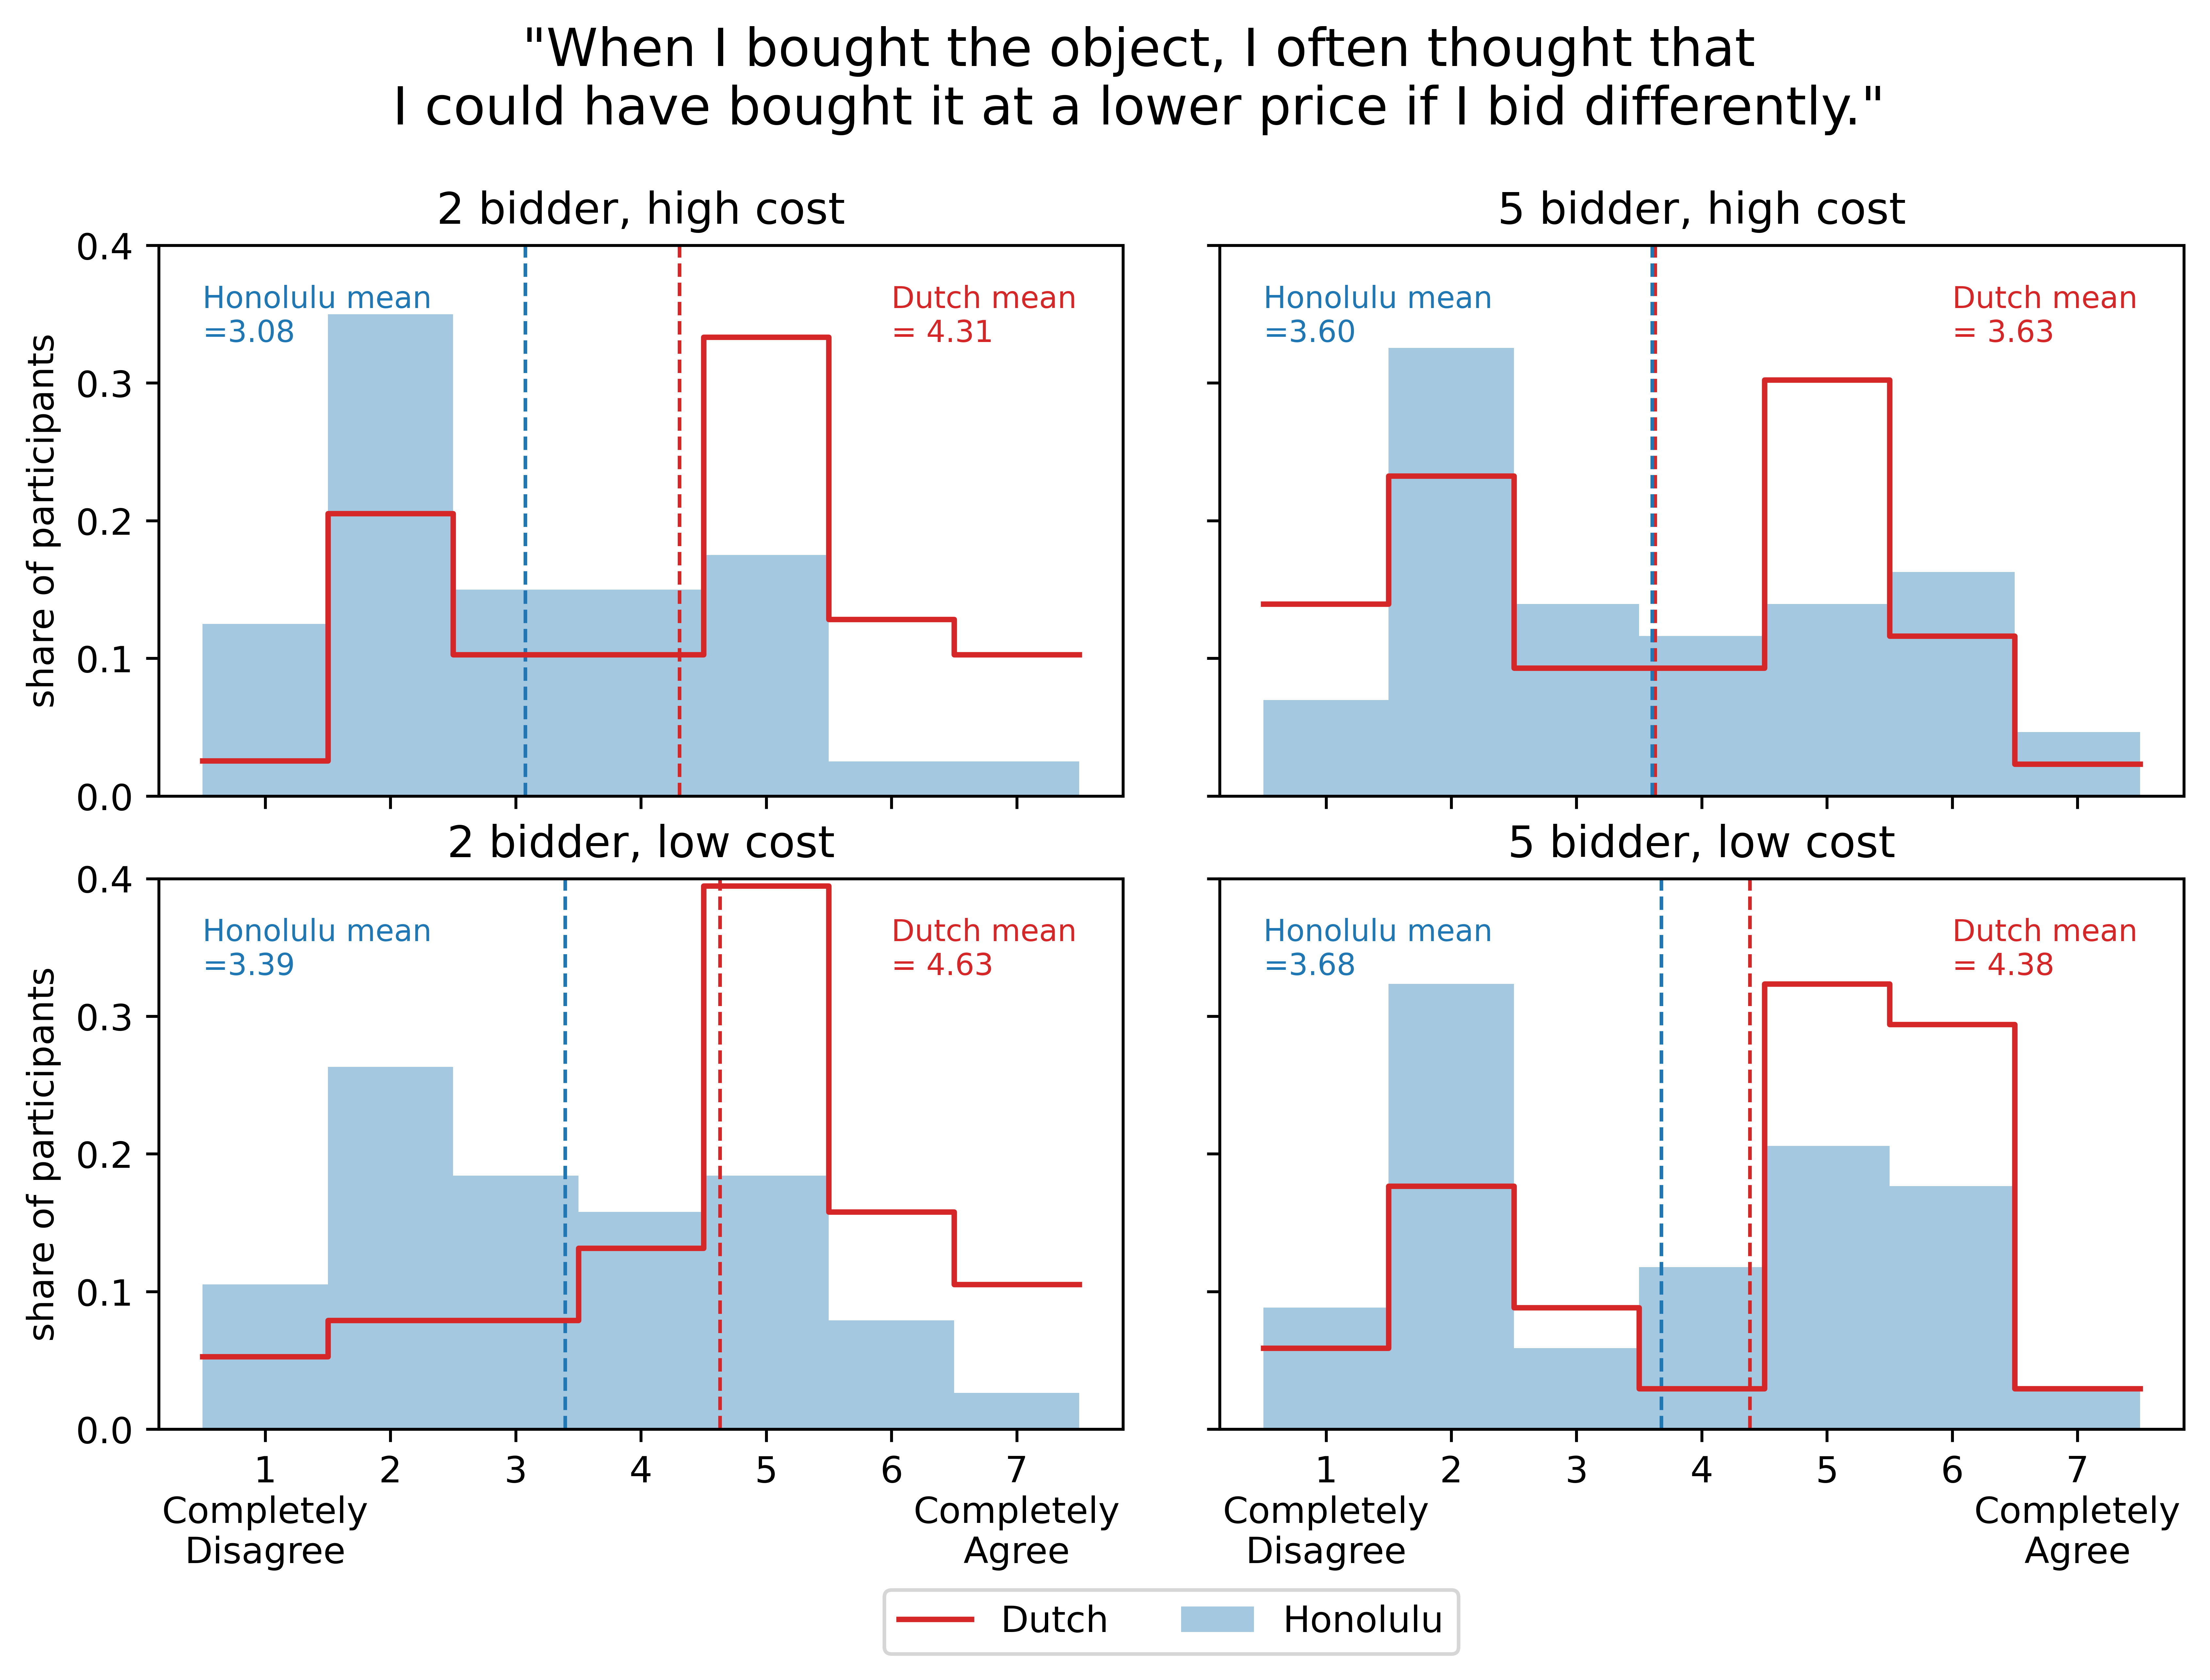

In [32]:
fig, ax = plt.subplots(2, 2, figsize=(10, 6), dpi=800, sharex=True, sharey=True, facecolor="white")
plt.subplots_adjust(wspace=0.1, hspace=0.15)
plotWinRegret(2, 0.019, ax[0, 0])
plotWinRegret(2, 0.009, ax[1, 0])
plotWinRegret(5, 0.019, ax[0, 1])
plotWinRegret(5, 0.009, ax[1, 1])
plt.suptitle("\"When I bought the object, I often thought that\nI could have bought it at a lower price if I bid differently.\"", fontsize="x-large", y=1.02)
plt.legend(ncol=2, loc="center", bbox_to_anchor=(-0.05, -0.35))

plt.savefig("winner_regret_pyplot.png", bbox_inches="tight", format="png")

In [33]:
def plotLoseRegret(n, b, ax):

    dict_code = dict_treatment[(n, b)]
    list_d = fb_d[fb_d["participant.code"].isin(dict_code)]["auc4"].dropna()
    list_h = fb_h[fb_h["participant.code"].isin(dict_code)]["auc4"].dropna()

    mean_d = np.mean(list_d)
    ax.axvline(mean_d, color="C3", linewidth=1, linestyle="--")
    mean_h = np.mean(list_h)
    ax.axvline(mean_h, color="C0", linewidth=1, linestyle="--")
    ax.text(6, 0.33, "Dutch mean\n= %.2f" % mean_d, color="C3", fontsize="small")
    ax.text(0.5, 0.33, "Honolulu mean\n=%.2f" % mean_h, color="C0", fontsize="small")
    
    # hist_d = np.histogram(list_d[list_d["participant.code"].isin(dict_treatment[treatment])]["auc3"], bins = np.arange(1, 9, 1), density=True)
    # hist_dx = hist_d[1][:-1]
    # hist_dy = hist_d[0]
    # hist_dxnew = np.linspace(1, 7, 101)
    # hist_dynew = interp1d(hist_dx, hist_dy, kind="cubic")(hist_dxnew)
    # plt.plot(hist_dxnew, hist_dynew)

    sns.histplot(
        list_d,
        bins=np.arange(0.5, 8, 1), ax=ax,
        color="C3", element="step", fill=False, stat="probability", label="Dutch",
    )
    sns.histplot(
        list_h,
        bins = np.arange(0.5, 8, 1), ax=ax,
        color="C0", edgecolor=None, alpha=0.4, stat="probability", label="Honolulu",
    )
    
    ax.set_ylim(0, 0.4)
    ax.set_xlabel("")
    ax.set_ylabel("share of participants")
    ax.set_xticks([1, 2, 3, 4, 5, 6, 7], labels=["1\nCompletely\nDisagree", "2", "3", "4", "5", "6", "7\nCompletely\nAgree"])
    ax.set_title("%d bidder, " % n + "%s cost" % ("high" if b == 0.019 else "low"))

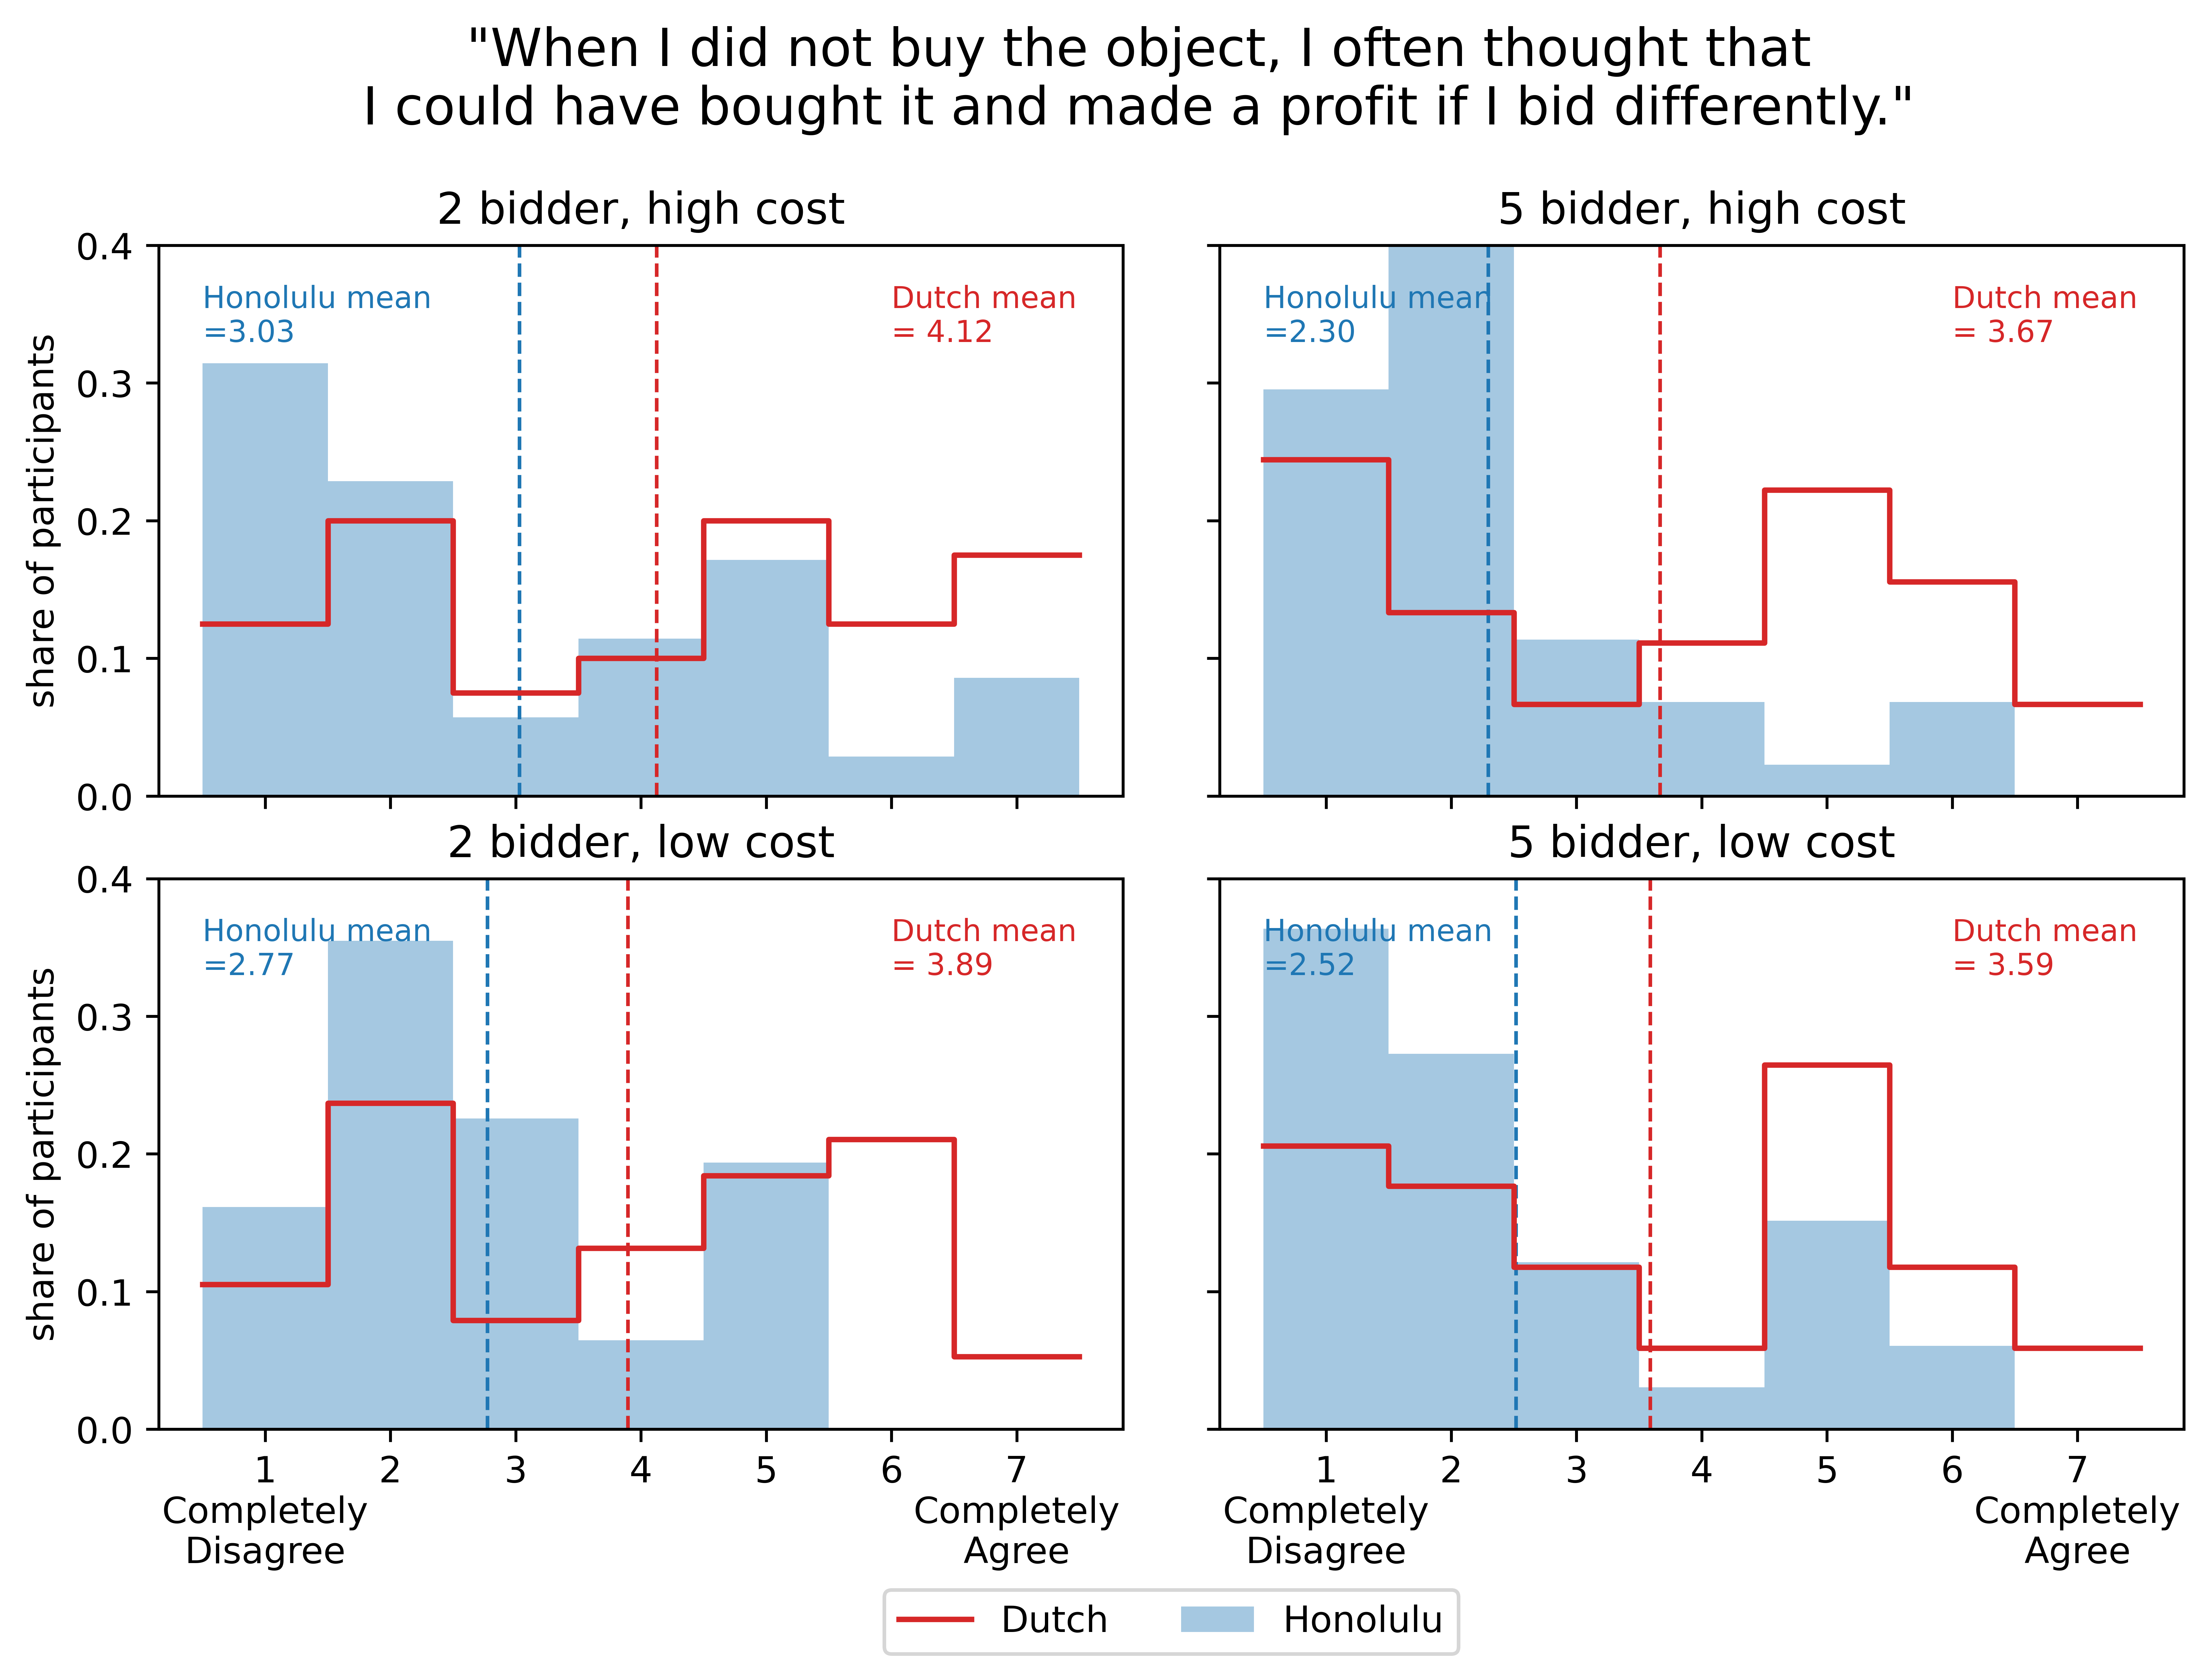

In [34]:
fig, ax = plt.subplots(2, 2, figsize=(10, 6), dpi=800, sharex=True, sharey=True, facecolor="white")
plt.subplots_adjust(wspace=0.1, hspace=0.15)
plotLoseRegret(2, 0.019, ax[0, 0])
plotLoseRegret(2, 0.009, ax[1, 0])
plotLoseRegret(5, 0.019, ax[0, 1])
plotLoseRegret(5, 0.009, ax[1, 1])
plt.suptitle("\"When I did not buy the object, I often thought that\nI could have bought it and made a profit if I bid differently.\"", fontsize="x-large", y=1.02)
plt.legend(ncol=2, loc="center", bbox_to_anchor=(-0.05, -0.35))

plt.savefig("loser_regret_pyplot.png", bbox_inches="tight", format="png")